In [1]:
#Import Statements
import numpy as np
import pandas as pd
import re

#Imports for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

#Imports for Evaluation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy import stats
import sklearn.metrics as sm
from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore')

#Import for mixed data
import numpy as np
import pandas as pd
from prince import FAMD
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
random_state = 1234
pd.options.plotting.backend = "plotly"
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE


In [2]:
#Data Pre-processing
Data = pd.read_csv('2021-03-24_Dataset_Cars.csv')
display(Data)
outlier=Data['name'].apply(lambda x:True if (x.find(',')!=-1) else False)
a=Data[outlier]['name'].tolist()
index=Data[outlier].index
for value,i in zip(a,index):
    substring=value.split(',')
    Data.loc[i,'name']=substring[0]
    Data.loc[i,'year']=substring[1]
    Data.loc[i,'selling_price']=substring[2]
    Data.loc[i,'km_driven']=substring[3]
    Data.loc[i,'fuel']=substring[4]
    Data.loc[i,'seller_type']=substring[5]
    Data.loc[i,'transmission']=substring[6]
    Data.loc[i,'owner']=substring[7]
    Data.loc[i,'mileage']=substring[8]
    Data.loc[i,'engine']=substring[9]
    Data.loc[i,'max_power']=substring[10]
    Torque_substring=(str(re.findall('"([^"]*)"', value))).replace(',','')
    new_string=Torque_substring.replace('[','')
    new_string=new_string.replace(']','')
    new_string=new_string.replace("'","")
    Data.loc[i,'torque']=new_string
    Data.loc[i,'seats']=substring[len(substring)-1]
Data.info()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,"Hyundai Verna CRDi SX,2007,135000,119000,Diese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8125,Maruti Swift Dzire ZDi,2009.0,382000.0,120000.0,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013.0,290000.0,25000.0,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   object
 2   selling_price  8128 non-null   object
 3   km_driven      8128 non-null   object
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
 8   mileage        7907 non-null   object
 9   engine         7907 non-null   object
 10  max_power      7913 non-null   object
 11  torque         7906 non-null   object
 12  seats          7907 non-null   object
dtypes: object(13)
memory usage: 825.6+ KB


In [3]:
car_df = Data.set_index('name')
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,12.7@ 2700(kgm@ rpm),5
Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,11.5@ 4500(kgm@ rpm),5
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,24@ 1900-2750(kgm@ rpm),5
Maruti Swift Dzire ZDi,2009.0,382000.0,120000.0,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


In [4]:
#Transformation of object data to Quantitative Data
car_df[['year','selling_price','km_driven']] = car_df[['year','selling_price','km_driven']].apply(pd.to_numeric) 
car_df['mileage'] = car_df['mileage'].str.replace('([A-Za-z/ ]+)', '')
car_df['engine'] = car_df['engine'].str.replace('([A-Za-z/ ]+)', '')
car_df['max_power'] = car_df['max_power'].str.replace('([A-Za-z/ ]+)', '')
car_df[['mileage','engine','max_power','seats']] = car_df[['mileage','engine','max_power','seats']].apply(pd.to_numeric,errors='coerce')
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7@ 2700(kgm@ rpm),5.0
Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5@ 4500(kgm@ rpm),5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
Hyundai Verna CRDi SX,2007.0,135000.0,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24@ 1900-2750(kgm@ rpm),5.0
Maruti Swift Dzire ZDi,2009.0,382000.0,120000.0,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0


In [5]:
all_duplicates = car_df.loc[car_df.duplicated(keep=False), :]
all_duplicates.sort_values('name')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Audi Q3 2.0 TDI Quattro Premium Plus,2017.0,2825000.0,22000.0,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380Nm@ 1750-2500rpm,5.0
Audi Q3 2.0 TDI Quattro Premium Plus,2017.0,2825000.0,22000.0,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380Nm@ 1750-2500rpm,5.0
Audi Q5 3.0 TDI Quattro,2014.0,1850000.0,76131.0,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,580Nm@ 1400-3250rpm,5.0
Audi Q5 3.0 TDI Quattro,2014.0,1850000.0,76131.0,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,580Nm@ 1400-3250rpm,5.0
Audi Q5 35TDI Premium Plus,2018.0,3975000.0,31800.0,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo XC40 D4 Inscription BSIV,2019.0,3800000.0,20000.0,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
Volvo XC40 D4 Inscription BSIV,2019.0,3800000.0,20000.0,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
Volvo XC40 D4 Inscription BSIV,2019.0,3800000.0,20000.0,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0


In [6]:
duplicates = car_df.loc[car_df.duplicated(keep='first'), :]
duplicates.sort_values('name')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Audi Q3 2.0 TDI Quattro Premium Plus,2017.0,2825000.0,22000.0,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380Nm@ 1750-2500rpm,5.0
Audi Q5 3.0 TDI Quattro,2014.0,1850000.0,76131.0,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,580Nm@ 1400-3250rpm,5.0
Audi Q5 35TDI Premium Plus,2018.0,3975000.0,31800.0,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400nm@ 1750-3000rpm,5.0
Audi Q5 35TDI Premium Plus,2018.0,3975000.0,31800.0,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400nm@ 1750-3000rpm,5.0
Audi Q5 35TDI Premium Plus,2018.0,3975000.0,31800.0,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo XC40 D4 Inscription BSIV,2019.0,3800000.0,20000.0,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
Volvo XC40 D4 Inscription BSIV,2019.0,3800000.0,20000.0,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
Volvo XC40 D4 Inscription BSIV,2019.0,3800000.0,20000.0,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0


In [7]:
#Dealing with Duplicates
car_df = car_df.drop_duplicates(keep='first')
car_df.sort_values('name')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Ambassador CLASSIC 1500 DSL AC,2000.0,75000.0,90000.0,Diesel,Individual,Manual,Second Owner,12.80,1489.0,35.5,72.9Nm@ 2250rpm,5.0
Ambassador Classic 2000 DSZ AC PS,1994.0,99000.0,100000.0,Diesel,Individual,Manual,Second Owner,12.80,1995.0,52.0,106Nm@ 2200rpm,5.0
Ambassador Grand 1500 DSZ BSIII,2008.0,122000.0,60000.0,Diesel,Individual,Manual,Second Owner,12.80,1995.0,52.0,106Nm@ 2200rpm,5.0
Ambassador Grand 2000 DSZ PW CL,2008.0,200000.0,80000.0,Diesel,Individual,Manual,Third Owner,13.50,1995.0,52.0,106Nm@ 2200rpm,5.0
Ashok Leyland Stile LE,2013.0,300000.0,200000.0,Diesel,Individual,Manual,Second Owner,20.07,1461.0,75.0,185Nm@ 1750-2750rpm,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo V40 D3 R-Design,2018.0,2475000.0,2000.0,Diesel,Dealer,Automatic,First Owner,16.80,1984.0,150.0,350Nm@ 1500-2750rpm,5.0
Volvo XC40 D4 Inscription BSIV,2019.0,3800000.0,20000.0,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.0,400Nm,5.0
Volvo XC40 D4 R-Design,2018.0,3400000.0,22000.0,Diesel,Dealer,Automatic,First Owner,18.00,1969.0,190.0,400Nm,5.0


In [8]:
car_df = car_df.where(car_df['km_driven'] < 1000000)
# car_df = car_df.where(car_df['selling_price'] < 8000000)
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7@ 2700(kgm@ rpm),5.0
Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5@ 4500(kgm@ rpm),5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Maruti Wagon R VXI BS IV with ABS,2013.0,260000.0,50000.0,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0
Hyundai i20 Magna 1.4 CRDi,2014.0,475000.0,80000.0,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0
Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0


In [9]:
#Dealing with NULL and outliers Values
car_df = car_df.dropna()
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7@ 2700(kgm@ rpm),5.0
Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5@ 4500(kgm@ rpm),5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Maruti Wagon R VXI BS IV with ABS,2013.0,260000.0,50000.0,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0
Hyundai i20 Magna 1.4 CRDi,2014.0,475000.0,80000.0,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0
Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0


In [10]:
display(np.unique(car_df['seller_type']))
display(np.unique(car_df['transmission']))
display(np.unique(car_df['fuel']))
display(np.unique(car_df['owner']))

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

array([' ', 'Automatic', 'Manual'], dtype=object)

array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object)

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

In [11]:
car_df['seller_type'] = pd.Categorical(car_df['seller_type'], 
                                             categories=['Dealer', 'Individual', 'Trustmark Dealer'])
car_df['fuel'] = pd.Categorical(car_df['fuel'], 
                                             categories=['CNG', 'Diesel', 'LPG', 'Petrol'])
car_df['owner'] = pd.Categorical(car_df['owner'], 
                                             categories=['First Owner', 'Fourth & Above Owner', 'Second Owner','Test Drive Car', 'Third Owner'])
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7@ 2700(kgm@ rpm),5.0
Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5@ 4500(kgm@ rpm),5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Maruti Wagon R VXI BS IV with ABS,2013.0,260000.0,50000.0,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0
Hyundai i20 Magna 1.4 CRDi,2014.0,475000.0,80000.0,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0
Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0


In [12]:
def plot_3d(x,y,z):
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    ax.grid()
    ax.scatter(x, y, z, s = 50,alpha=0.6,edgecolor='w',c=z)
    ax.set_title('3D Scatter Plot')
    # Set axes label
    ax.set_xlabel('Year', labelpad=20)
    ax.set_ylabel('KM Driven', labelpad=20)
    ax.set_zlabel('Selling Price', labelpad=20)

In [13]:
def plot_cluster3d(x,y,z,pred):
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    ax.grid()
    ax.scatter(x, y, z, s = 50,alpha=0.6,edgecolor='w',c=pred)
    ax.set_title('3D K-Means Clustering Plot')
    # Set axes label
    ax.set_xlabel(x.name, labelpad=20)
    ax.set_ylabel(y.name, labelpad=20)
    ax.set_zlabel(z.name, labelpad=20)

In [14]:
ysk_df = car_df[['year','selling_price','km_driven','fuel']]
ysk_df

,year,selling_price,km_driven,fuel
name,,,,
Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel
Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel
Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol
Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel
Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,Petrol
...,...,...,...,...
Maruti Wagon R VXI BS IV with ABS,2013.0,260000.0,50000.0,Petrol
Hyundai i20 Magna 1.4 CRDi,2014.0,475000.0,80000.0,Diesel
Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol


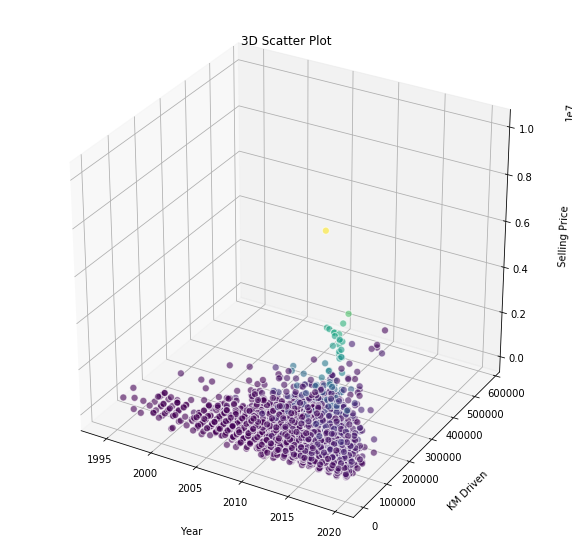

In [15]:
plot_3d(ysk_df.year,ysk_df.km_driven,ysk_df.selling_price)

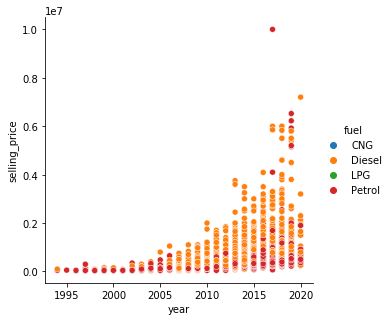

In [16]:
sns.pairplot(ysk_df, x_vars=['year'], y_vars=['selling_price'],hue='fuel',size=4.5)

In [17]:
ysk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6696 entries, Maruti Swift Dzire VDI to Maruti Swift Dzire ZDi
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           6696 non-null   float64 
 1   selling_price  6696 non-null   float64 
 2   km_driven      6696 non-null   float64 
 3   fuel           6696 non-null   category
dtypes: category(1), float64(3)
memory usage: 345.0+ KB


In [18]:
M = np.mean(car_df['year'])
S = np.std(car_df['year'])
Z = (2006 - M)/S
print(M)
print(S)
print(Z)

2013.6091696535245
3.899158170166056
-1.951490378550218


In [19]:
# Separation of Continuous Data and Categorical Data
con_feats = ['year','selling_price','km_driven','mileage','max_power','engine','seats']
cat_feats = ['fuel','seller_type','transmission','owner']
con_df = pd.DataFrame(car_df, columns=con_feats)
cat_df = pd.DataFrame(car_df, columns=cat_feats)

In [20]:
# Label Encoder
lencode_df = cat_df
label_encoder = preprocessing.LabelEncoder()
for i in range(len(lencode_df.columns)):
    lencode_df.iloc[: , i] = label_encoder.fit_transform(lencode_df.iloc[: , i])
lencode_df

,fuel,seller_type,transmission,owner
name,,,,
Maruti Swift Dzire VDI,1,1,2,0
Skoda Rapid 1.5 TDI Ambition,1,1,2,2
Honda City 2017-2020 EXi,3,1,2,4
Hyundai i20 Sportz Diesel,1,1,2,0
Maruti Swift VXI BSIII,3,1,2,0
...,...,...,...,...
Maruti Wagon R VXI BS IV with ABS,3,1,2,2
Hyundai i20 Magna 1.4 CRDi,1,1,2,2
Hyundai i20 Magna,3,1,2,0


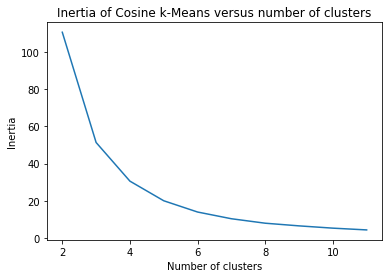

In [21]:
# X1 = con_df.drop(columns = ['seats','max_power','mileage'])
X1 = con_df
#Calculation of inertia of the cosine k-means versus cluster number  
normalized_vectors = preprocessing.normalize(X1)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.savefig("intertia_cosine_kmeans.jpg", dpi=300)

In [37]:
#Calcuation of the silhouette score for the different k-means approaches
from sklearn.metrics import silhouette_score# Prepare models
kmeans = KMeans(n_clusters=2).fit(X1)
normalized_vectors = preprocessing.normalize(X1)
normalized_kmeans = KMeans(n_clusters=2).fit(normalized_vectors)
print('kmeans: {}'.format(silhouette_score(X1, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))

kmeans: 0.808608498315821
Cosine kmeans:0.8222118758504591


In [39]:
kmeans = KMeans(n_clusters=2).fit(X1)
print('kmeans: {}'.format(silhouette_score(X1, kmeans.labels_, 
                                           metric='euclidean')))

kmeans: 0.8226430124415468


In [32]:
kmeans = KMeans(n_clusters=3).fit(X1)
print('kmeans: {}'.format(silhouette_score(X1, kmeans.labels_, 
                                           metric='euclidean')))

kmeans: 0.5841329767018361


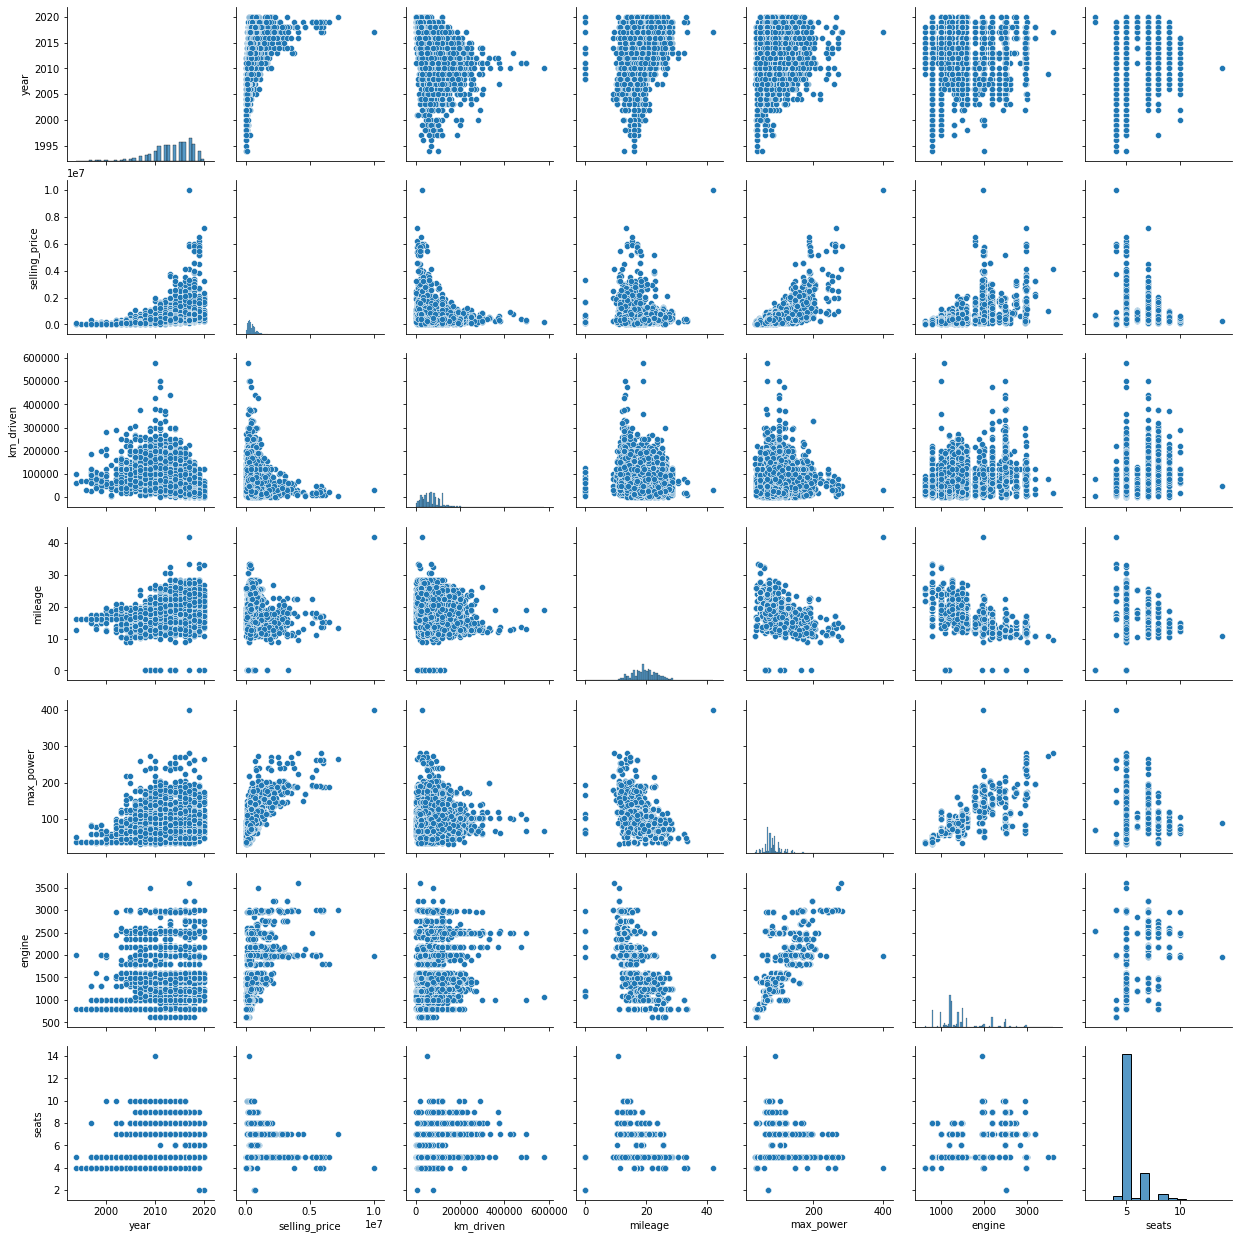

In [23]:
sns.pairplot(X1)

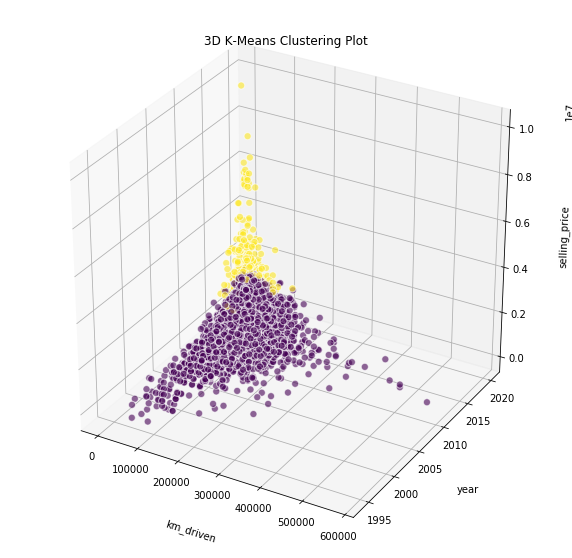

In [24]:
#K-Means clustering with Continuous Data only
model = KMeans(n_clusters=2, random_state=random_state).fit(X1)
pred = model.labels_
plot_cluster3d(X1.km_driven,X1.year,X1.selling_price,pred)

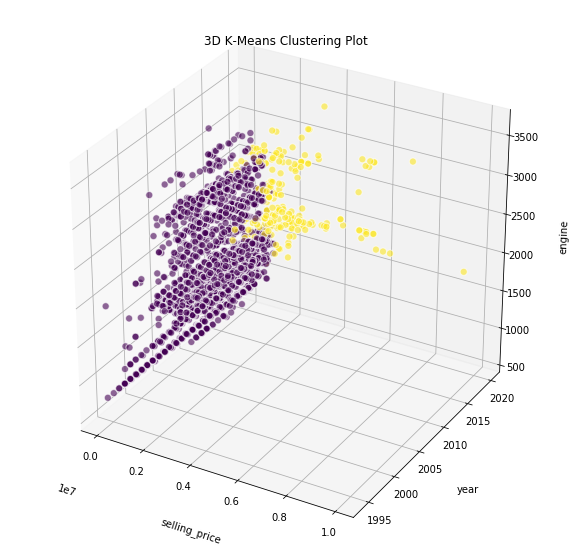

In [25]:
plot_cluster3d(X1.selling_price,X1.year,X1.engine,pred)

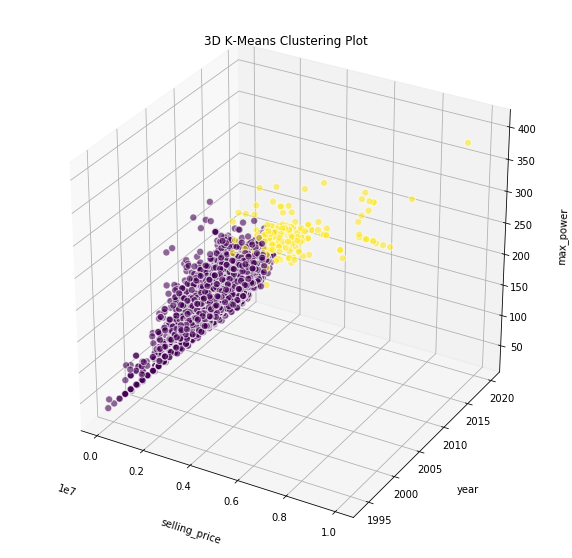

In [26]:
plot_cluster3d(X1.selling_price,X1.year,X1.max_power,pred)

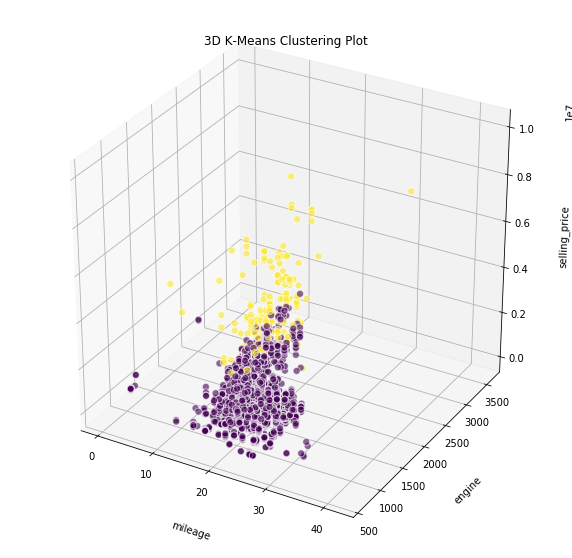

In [27]:
plot_cluster3d(X1.mileage,X1.engine,X1.selling_price,pred)

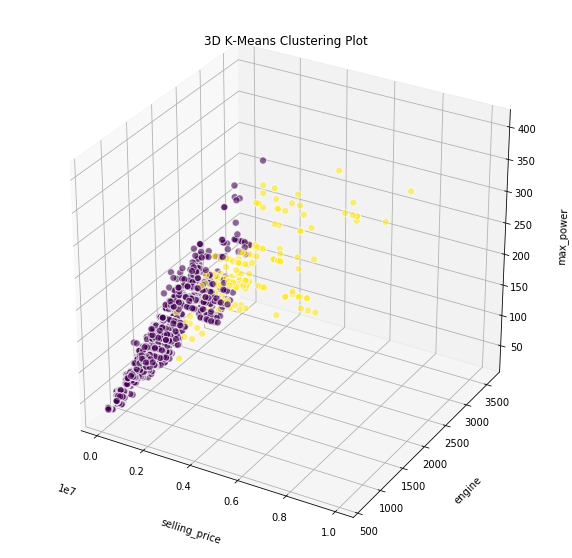

In [28]:
plot_cluster3d(X1.selling_price,X1.engine,X1.max_power,pred)

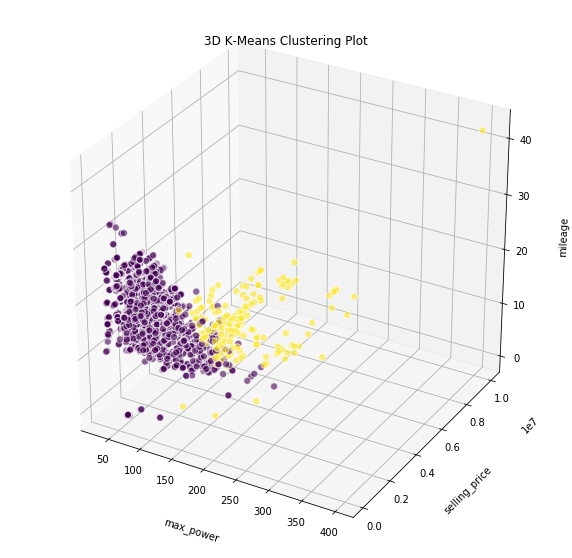

In [29]:
plot_cluster3d(X1.max_power,X1.selling_price,X1.mileage,pred)